Assessment Task


Suggested possible analysis 

- What are the most important features for predicting X as a target variable?
- Which classification approach do you prefer for the prediction of X as a target variable, and why? o How to classify the loyal and churn customers using Support Vector Machines?
- Why is dimensionality reduction important in machine learning?

The pair would need to consider the following instructions (a - d) during the development of this pair project.
a) Logical justification based on the reasoning for the specific choice of machine learning approaches.
b) Multiple machine learning approaches (at least two) using hyperparameters and a comparison
between the chosen modelling approaches.
 c) Visualise your comparison of ML modelling outcomes. You may use a statistical approach to argue that one feature is more important than other features (for example, using PCA).
d) Cross-validation methods should be used to justify the authenticity of your ML results.
Your pair will present their findings and defend the results in the report (MS Doc or Open word format) by highlighting their individual contribution. Your report should capture the following aspects that are relevant
to 1.
2.
3.
4.
5.
your project investigations.
Motivation, a description of the problem domain, and an explanation of how the project's goals are justified using Prediction / Classification / Clustering Rules / Dimensionality Reduction etc..
(10 marks) Characterization of data, explanation and description of techniques used for the variation in the
accuracy across three training splits (10% / 20%/ 30%) using cross validation techniques.
(30 marks) Interpret and explain the results obtained, discuss overfitting / underfitting / generalisation, provide a rationale for the chosen model and use visualisations to support your findings. Comments in Python code, conclusions of the project should be specified at the end of the report. Harvard Style must be
used for citations and references.
(20 marks) Each team member presents a PowerPoint presentation of their work (maximum 5 slides) to emphasize their distinctive contributions based on their involvement in the project's conceptual
understanding, code development, and deployment.
(20 marks individual) Each team member fully described their individual contributions to the project in a reflective journal, using at least 500 to 700 words as well as images, diagrams, figures, and visualizations to elaborate
his/ her work.
Submission Requirements
All assessment submissions must meet the minimum requirements listed below. Failure to do so may have implications for the marks awarded.
● The code and datasets should be provided and uploaded in zip format on Moodle.
● Clearly detail the number of words used in the report.
● Number of Words in the report (2000 words +/-10%) excluding diagrams, code, references and
titles. Number of words used to express individual contributions is part of the mentioned words.
● In the case of individual submission, students will submit a (1000 words +/-10%) report.
● Describe the contribution of each team member in the project clearly and use a bar chart or pie
chart to represent the effort and time spent during this project. Use version control like Github or any other tool to show the progress of both team members in CA1. You should have at least 5 commits on Github before submission.
● The rubric is provided for the detailed breakdown of marks at the end of this CA1.
● Use Harvard Referencing when citing third party material
● Be the student’s own work.
● Include the CCT assessment cover page.
● Be submitted by the deadline date specified or be subject to late submission penalties
(20 marks individual)
 
● Note: The names of pair members must be uploaded on the link provided on Moodle until 15th October 2023 (23:59).
● Must be clearly specified the number of words used after each section in the report.

# DO CROSS VALIDATION AND ANN

In [1]:
%matplotlib inline

import pandas as pd

import numpy as np

import matplotlib.pyplot as plt

import seaborn as sns

from sklearn.model_selection import train_test_split, cross_val_score

from sklearn import metrics

from sklearn.preprocessing import MinMaxScaler

# EDA

In [2]:
bike = pd.read_csv("Seoul_Bike.csv")

DOI
10.24432/C5F62R
License
This dataset is licensed under a Creative Commons Attribution 4.0 International (CC BY 4.0) license.
This allows for the sharing and adaptation of the datasets for any purpose, provided that the appropriate credit is given.

https://archive.ics.uci.edu/dataset/560/seoul+bike+sharing+demand


In [3]:
bike.head(3)

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes


In [4]:
bike.shape

(8760, 14)

In [5]:
bike.describe()

,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm)
count,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000
mean,704.602055,11.500000,12.882922,58.226256,1.724909,1436.825799,4.073813,0.569111,0.148687,0.075068
std,644.997468,6.922582,11.944825,20.362413,1.036300,608.298712,13.060369,0.868746,1.128193,0.436746
min,0.000000,0.000000,-17.800000,0.000000,0.000000,27.000000,-30.600000,0.000000,0.000000,0.000000
25%,191.000000,5.750000,3.500000,42.000000,0.900000,940.000000,-4.700000,0.000000,0.000000,0.000000
50%,504.500000,11.500000,13.700000,57.000000,1.500000,1698.000000,5.100000,0.010000,0.000000,0.000000
75%,1065.250000,17.250000,22.500000,74.000000,2.300000,2000.000000,14.800000,0.930000,0.000000,0.000000
max,3556.000000,23.000000,39.400000,98.000000,7.400000,2000.000000,27.200000,3.520000,35.000000,8.800000


In [6]:
bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       8760 non-null   object 
 1   Rented Bike Count          8760 non-null   int64  
 2   Hour                       8760 non-null   int64  
 3   Temperature(°C)            8760 non-null   float64
 4   Humidity(%)                8760 non-null   int64  
 5   Wind speed (m/s)           8760 non-null   float64
 6   Visibility (10m)           8760 non-null   int64  
 7   Dew point temperature(°C)  8760 non-null   float64
 8   Solar Radiation (MJ/m2)    8760 non-null   float64
 9   Rainfall(mm)               8760 non-null   float64
 10  Snowfall (cm)              8760 non-null   float64
 11  Seasons                    8760 non-null   object 
 12  Holiday                    8760 non-null   object 
 13  Functioning Day            8760 non-null   objec

## Changing from categorical to numerical

In [7]:
bike["Seasons"].unique()

array(['Winter', 'Spring', 'Summer', 'Autumn'], dtype=object)

In [8]:
bike["Holiday"].unique()

array(['No Holiday', 'Holiday'], dtype=object)

In [9]:
bike["Functioning Day"].unique()

array(['Yes', 'No'], dtype=object)

In [10]:
bike['Seasons'].replace('Winter', 0, inplace = True)
bike['Seasons'].replace('Spring', 1, inplace = True)
bike['Seasons'].replace('Summer', 2, inplace = True)
bike['Seasons'].replace('Autumn', 3, inplace = True)

In [11]:
bike['Seasons'].tail(2)

8758    3
8759    3
Name: Seasons, dtype: int64

In [12]:
bike["Holiday"].replace('No Holiday', 0, inplace = True)
bike["Holiday"].replace('Holiday', 1, inplace = True)

In [13]:
bike["Holiday"].tail(2)

8758    0
8759    0
Name: Holiday, dtype: int64

In [14]:
bike["Functioning Day"].replace('No', 0, inplace = True)
bike["Functioning Day"].replace('Yes', 1, inplace = True)

In [15]:
bike["Functioning Day"].tail(2)

8758    1
8759    1
Name: Functioning Day, dtype: int64

<Axes: xlabel='Hour', ylabel='Rented Bike Count'>

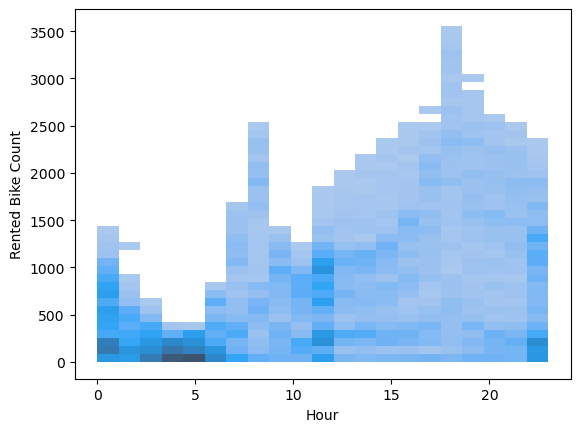

In [16]:
sns.histplot(data = bike, y = "Rented Bike Count", x = "Hour")

<Axes: xlabel='Holiday', ylabel='Count'>

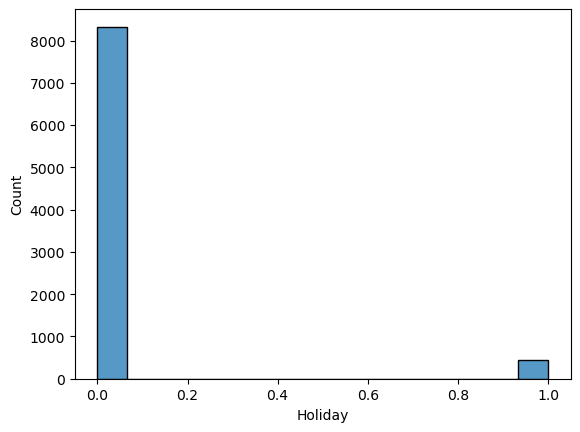

In [17]:
sns.histplot(data = bike, x = "Holiday")

The locals use more the bikes than the turists

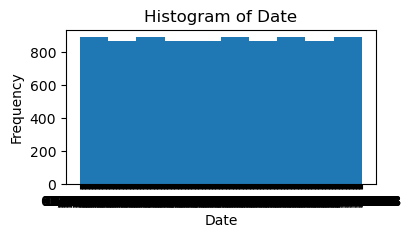

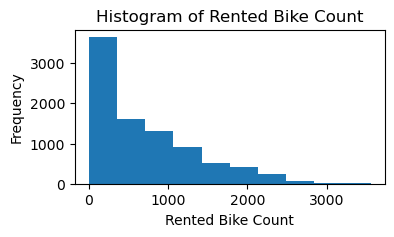

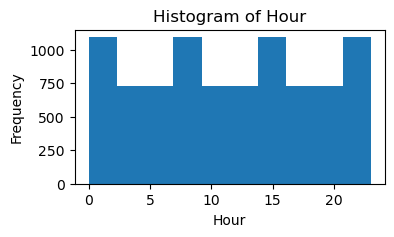

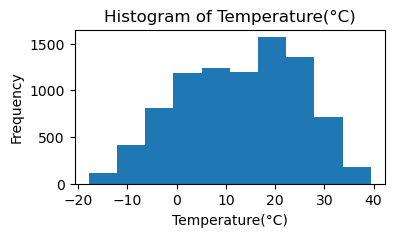

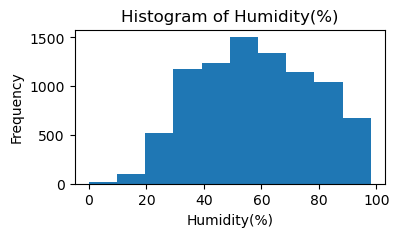

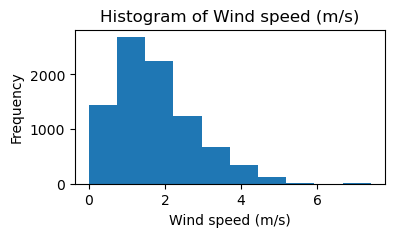

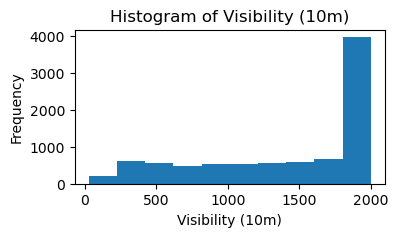

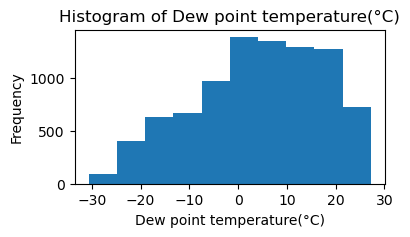

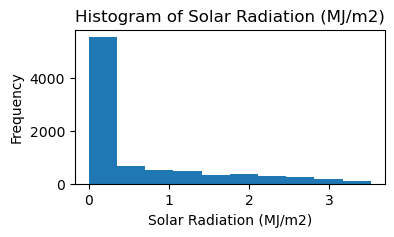

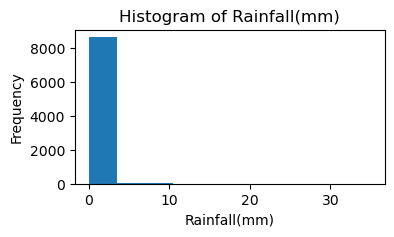

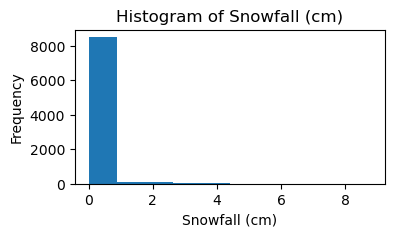

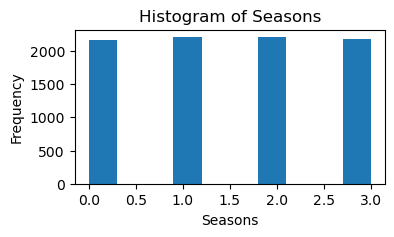

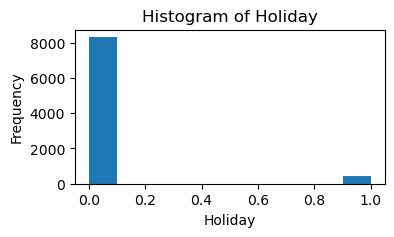

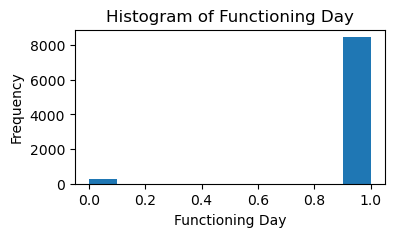

In [18]:
for column in bike.columns:
    plt.figure(figsize=(4, 2))
    plt.hist(bike[column], bins=10)
    plt.title(f'Histogram of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.show()

<Axes: xlabel='Rented Bike Count', ylabel='Count'>

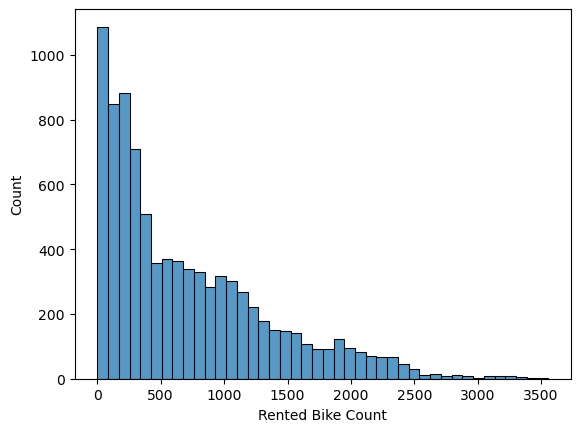

In [19]:
sns.histplot(data = bike, x = "Rented Bike Count")



<Axes: xlabel='Temperature(°C)', ylabel='Count'>

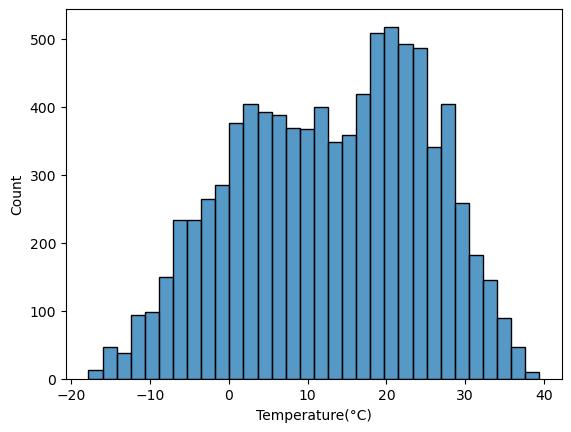

In [20]:
sns.histplot(data = bike, x = "Temperature(°C)")



<Axes: xlabel='Humidity(%)', ylabel='Count'>

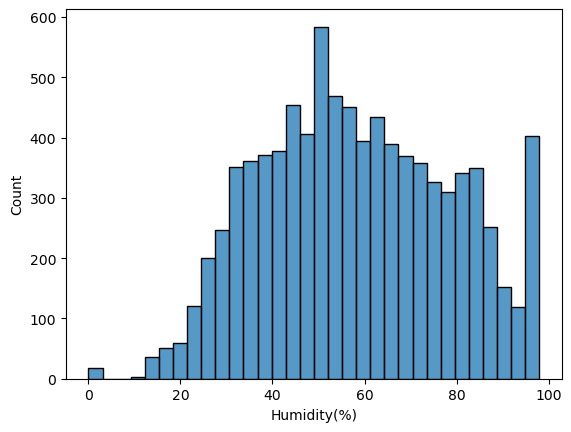

In [21]:
sns.histplot(data = bike, x = "Humidity(%)")



<Axes: xlabel='Wind speed (m/s)', ylabel='Count'>

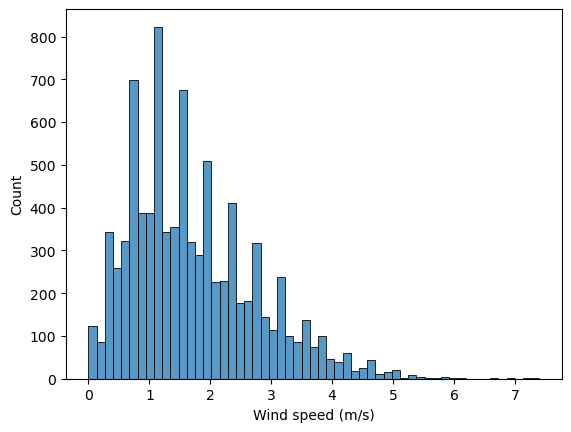

In [22]:
sns.histplot(data = bike, x = "Wind speed (m/s)")



<Axes: xlabel='Visibility (10m)', ylabel='Count'>

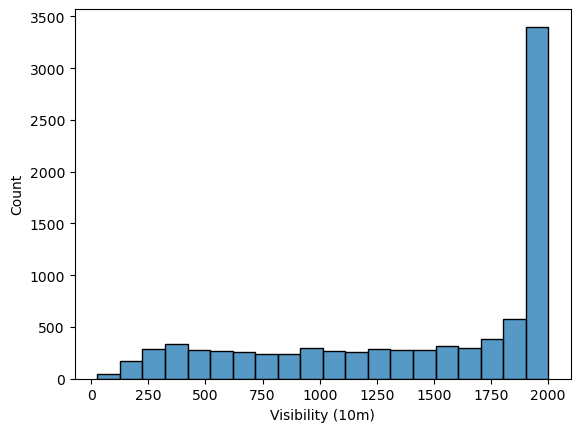

In [23]:
sns.histplot(data = bike, x = "Visibility (10m)")



<Axes: xlabel='Dew point temperature(°C)', ylabel='Count'>

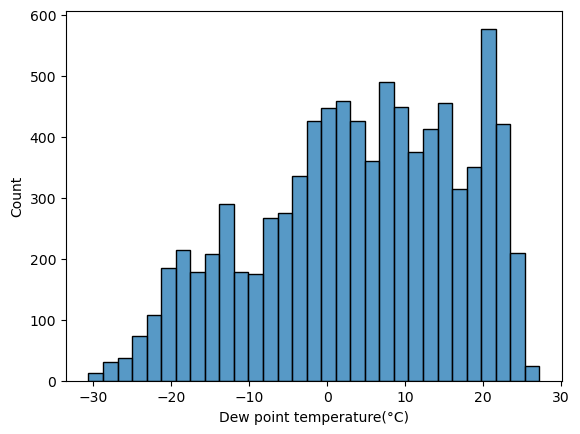

In [24]:
sns.histplot(data = bike, x = "Dew point temperature(°C)")



<Axes: xlabel='Solar Radiation (MJ/m2)', ylabel='Count'>

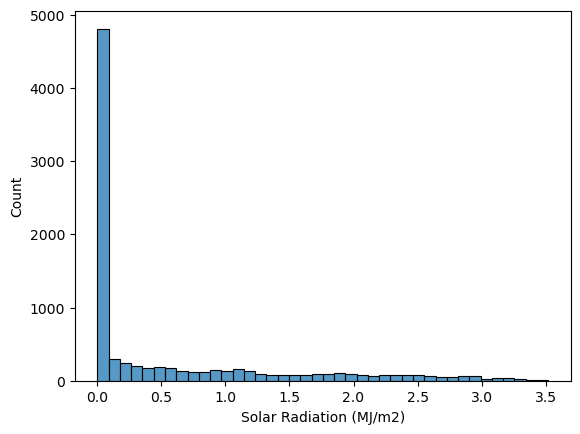

In [25]:
sns.histplot(data = bike, x = "Solar Radiation (MJ/m2)")


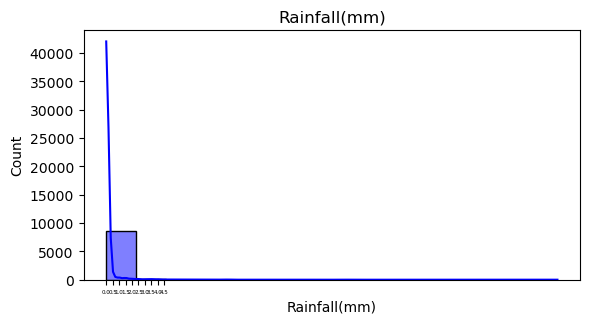

In [26]:
#Histogram
plt.figure(figsize=(6, 6))


plt.subplot(2, 1, 1)
sns.histplot(bike['Rainfall(mm)'], kde=True, color='blue')
plt.xticks(np.arange(0, 5, 0.5), fontsize = 4)
plt.title('Rainfall(mm)')
plt.tight_layout()
plt.show()

<Axes: xlabel='Snowfall (cm)', ylabel='Count'>

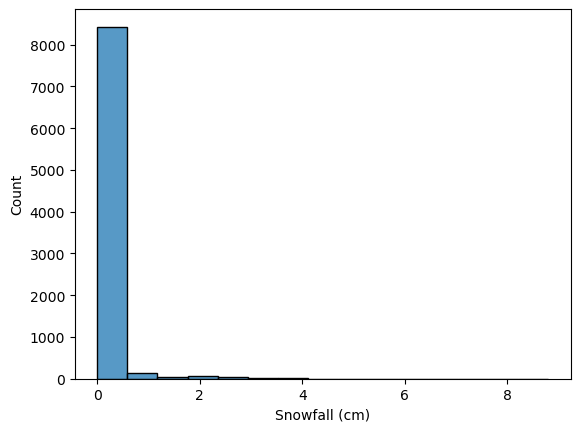

In [27]:
sns.histplot(data = bike, x = "Snowfall (cm)")

<Axes: xlabel='Seasons', ylabel='Count'>

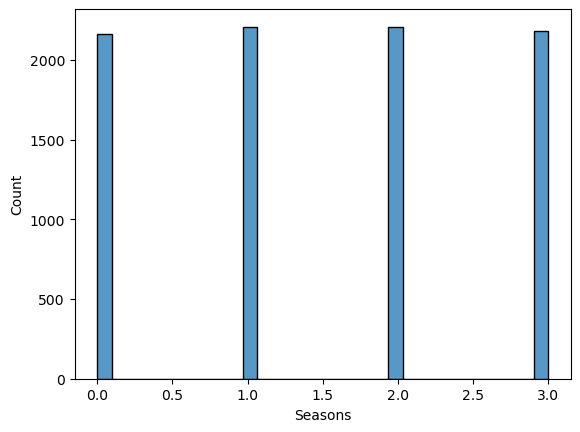

In [28]:
sns.histplot(data = bike, x = "Seasons")

The bikes have been used equally throughout the seasons 

In [29]:
bike.head(1)

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,0,0,1


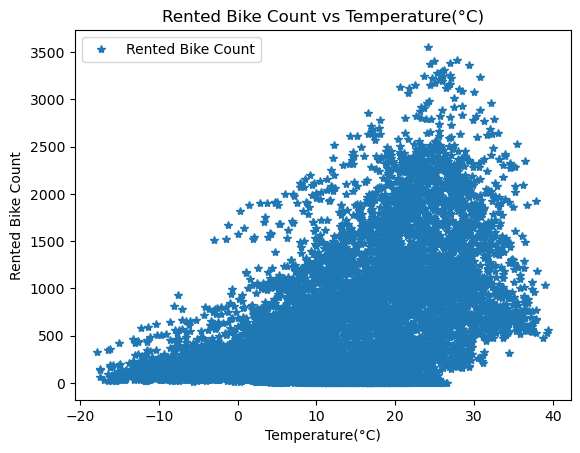

In [30]:
bike.plot(x = "Temperature(°C)", y = "Rented Bike Count", style = "*")
plt.title("Rented Bike Count vs Temperature(°C)")
plt.xlabel("Temperature(°C)")
plt.ylabel("Rented Bike Count")
plt.show()

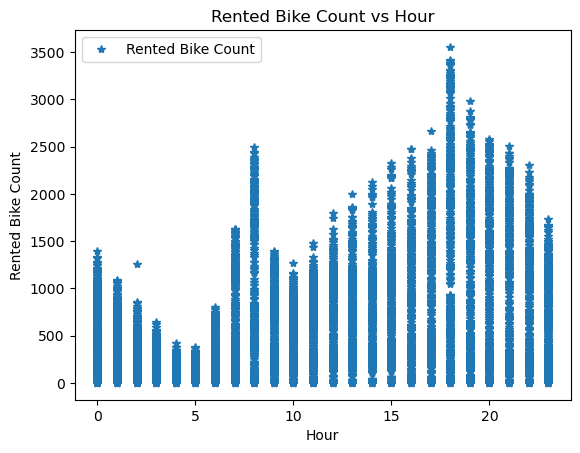

In [31]:
bike.plot(x = "Hour", y = "Rented Bike Count", style = "*")
plt.title("Rented Bike Count vs Hour")
plt.xlabel("Hour")
plt.ylabel("Rented Bike Count")
plt.show()

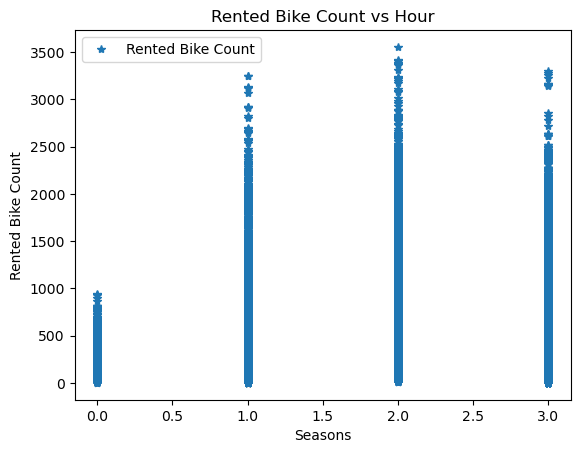

In [32]:
bike.plot(x = "Seasons", y = "Rented Bike Count", style = "*")
plt.title("Rented Bike Count vs Hour")
plt.xlabel("Seasons")
plt.ylabel("Rented Bike Count")
plt.show()

The seasons have the same amount of observations but the number of rented bikes are different between seasons

<Axes: xlabel='Seasons', ylabel='Rented Bike Count'>

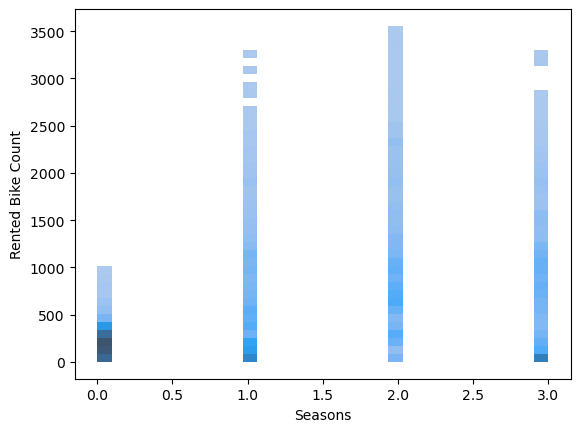

In [33]:
sns.histplot(data = bike, x = "Seasons", y = "Rented Bike Count")

sns.pairplot(data = bike)

<Axes: >

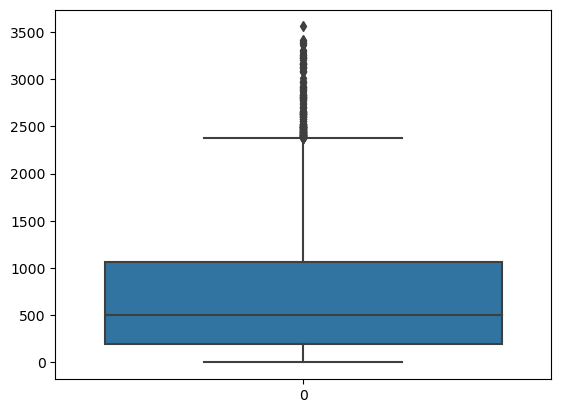

In [34]:
sns.boxplot(data = bike["Rented Bike Count"])

bike_split = bike.drop(["Rented Bike Count", "Date"], axis = 1)

rbc = bike[["Rented Bike Count"]]

rbc.head()

X = bike_split

y = rbc

X.head(3)

y.head(3)

In [35]:
bike.head(3)

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,0,0,1
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,0,0,1
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,0,0,1


In [36]:
bike_d = bike.drop(["Date"], axis = 1)

In [37]:
bike_d.head(3)

,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,0,0,1
1,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,0,0,1
2,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,0,0,1


bike_array = bike_d.values

In [38]:
X = bike_d.iloc[:, 1:]  # All rows, columns from index 1 onwards (excluding the first column)
y = bike_d.iloc[:, 0]   # All rows, only the first column

In [39]:
y

0        254
1        204
2        173
3        107
4         78
        ... 
8755    1003
8756     764
8757     694
8758     712
8759     584
Name: Rented Bike Count, Length: 8760, dtype: int64

In [40]:
X

,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,0,0,1
1,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,0,0,1
2,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,0,0,1
3,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,0,0,1
4,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
8755,19,4.2,34,2.6,1894,-10.3,0.0,0.0,0.0,3,0,1
8756,20,3.4,37,2.3,2000,-9.9,0.0,0.0,0.0,3,0,1
8757,21,2.6,39,0.3,1968,-9.9,0.0,0.0,0.0,3,0,1
8758,22,2.1,41,1.0,1859,-9.8,0.0,0.0,0.0,3,0,1


# Store first two columns (Sepal length and Sepal width) in an array X 
X = df.iloc[:,:2]

# Store the target variable as lable into an array y
y = df.iloc[:,1]

# Display number of rows and columns
X.shape, y.shape

X = bike_array[:, 1:13]

y = bike_array[:, 0:1]

X

X.shape

y.shape

y

In [41]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 50)

In [42]:
X.shape, y.shape, X_train.shape, X_test.shape, y_train.shape, y_test.shape

((8760, 12), (8760,), (7008, 12), (1752, 12), (7008,), (1752,))

In [43]:
scaler = MinMaxScaler()

scaler.fit(X_train)

X_train_scaled = scaler.transform(X_train)

X_test_scaled  = scaler.transform(X_test)

X_scaled = scaler.transform(X)

# PCA

from sklearn.decomposition import PCA

pca = PCA()

pca.fit(X_scaled)

variance = pca.explained_variance_ratio_

var = np.cumsum(np.round(pca.explained_variance_ratio_, decimals = 3)*100)



plt.figure()
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel("Number of Components")
plt.xticks(np.arange(0, 13, 1), fontsize = 15)
plt.ylabel("Variance (%)")
plt.yticks(np.arange(0.90, 1.0, 0.05), fontsize = 15)
#plt.xticks(np.arange(0, 24, 5), fontsize = 15, rotation = 0, ha = 'center')
plt.title("Train Dataset Explained Variance")
plt.show()

pca = PCA(n_components = 6)

bike_pca = pca.fit_transform(X_scaled)

bike_pca = pd.DataFrame(bike_pca)

bike_pca.head()

bike_concat = pd.concat([bike_pca, rbc], axis = 1)

bike_concat.head()

bike_array = bike_concat.values

X = bike_array[:,0:6]

y = bike_array[:,6]

y

X

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 12)

X.shape, y.shape, X_train.shape, X_test.shape, y_train.shape, y_test.shape

# Models

Correlation Matrix:
[[ 1.00000000e+00  1.24114492e-01 -2.41643787e-01  2.85196660e-01
   9.87534819e-02  3.05437169e-03  1.45130920e-01  8.71464186e-03
  -2.15164547e-02 -3.15460169e-18  1.38675119e-18  5.43937721e-03]
 [ 1.24114492e-01  1.00000000e+00  1.59370801e-01 -3.62517005e-02
   3.47944296e-02  9.12798219e-01  3.53505470e-01  5.02818585e-02
  -2.18404862e-01  5.91545260e-01 -5.59308410e-02 -5.01697573e-02]
 [-2.41643787e-01  1.59370801e-01  1.00000000e+00 -3.36683042e-01
  -5.43090345e-01  5.36894494e-01 -4.61918797e-01  2.36396670e-01
   1.08183453e-01  1.89237940e-01 -5.02776463e-02 -2.07999550e-02]
 [ 2.85196660e-01 -3.62517005e-02 -3.36683042e-01  1.00000000e+00
   1.71507137e-01 -1.76485692e-01  3.32274246e-01 -1.96740889e-02
  -3.55418612e-03 -1.66833914e-01  2.30167711e-02  5.03693775e-03]
 [ 9.87534819e-02  3.47944296e-02 -5.43090345e-01  1.71507137e-01
   1.00000000e+00 -1.76629730e-01  1.49738026e-01 -1.67629238e-01
  -1.21694515e-01  1.11974186e-01  3.17728081e-02 -2

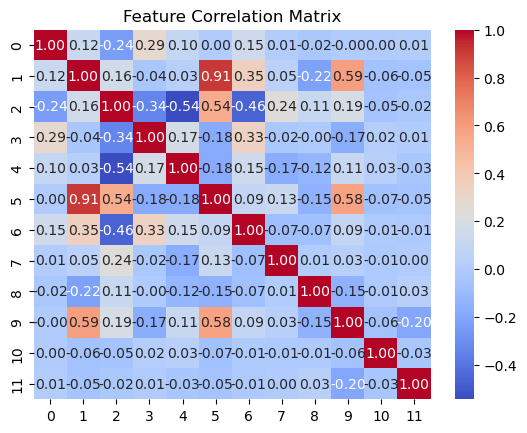

In [94]:
import numpy as np

# Assuming X is your feature matrix
corr_matrix = np.corrcoef(X, rowvar=False)

# Print the correlation matrix
print("Correlation Matrix:")
print(corr_matrix)

# Visualize the correlation matrix (optional)
import seaborn as sns
import matplotlib.pyplot as plt

sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', xticklabels=range(X.shape[1]), yticklabels=range(X.shape[1]))
plt.title("Feature Correlation Matrix")
plt.show()


# Linear Regression

In [44]:
from sklearn.linear_model import LinearRegression

In [45]:
def get_cv_scores(model):
    scores = cross_val_score(model,
                             X_train,
                             y_train,
                             cv = 12,
                             scoring='r2')
    
    print('CV Mean: ', np.mean(scores))
    print('STD: ', np.std(scores))
    print('\n')

In [46]:
lr = LinearRegression().fit(X_train, y_train)

get_cv_scores(lr)

CV Mean:  0.5398985769492975
STD:  0.021005026488033842




In [47]:
print(lr.intercept_)
print(lr.coef_)

-395.5357215355464
[ 2.73848484e+01  2.14257135e+01 -9.29435743e+00  2.21885269e+01
 -6.34370434e-03  4.92987822e+00 -7.18118136e+01 -6.11064080e+01
  1.28806267e+01  1.08170010e+02 -1.43139616e+02  9.21648164e+02]


In [48]:
y_pred = lr.predict(X_test)

pred = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
pred.head()

In [49]:
# Calculate the error values
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 323.3059315058731
Mean Squared Error: 190533.86822259615
Root Mean Squared Error: 436.50185363019494


# Evaluate the model performance
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')


In [51]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# Assuming X and y are your feature matrix and target variable, respectively
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 12)

# Initialize the Linear Regression model
linear_reg = LinearRegression()

# Train the Linear Regression model
linear_reg.fit(X_train, y_train)

# Make predictions on the test set
y_pred = linear_reg.predict(X_test)

# Evaluate the model performance
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')


Mean Squared Error: 185842.69668292074
R-squared: 0.5401567583588158


from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(X)


In [53]:
pred = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
pred.head()

,Actual,Predicted
5979,278,907.594090
1465,96,-174.514650
6844,215,887.754970
3308,1290,1209.507621
428,165,635.190941


In [54]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# Assuming X and y are your feature matrix and target variable, respectively
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 12)

# Polynomial features (e.g., degree=2 for quadratic regression)
degree = 2
poly_features = PolynomialFeatures(degree=degree)

# Transform the features to include polynomial terms
X_train_poly = poly_features.fit_transform(X_train)
X_test_poly = poly_features.transform(X_test)

# Initialize and train the polynomial regression model
poly_reg = LinearRegression()
poly_reg.fit(X_train_poly, y_train)

# Make predictions on the test set
y_pred = poly_reg.predict(X_test_poly)

# Evaluate the model performance
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')


Mean Squared Error: 132761.75680601771
R-squared: 0.671498543094116


In [55]:
pred = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
pred.head()

,Actual,Predicted
5979,278,552.851686
1465,96,-123.371865
6844,215,866.315405
3308,1290,1483.687897
428,165,118.160562


In [82]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Assuming X and y are your feature matrix and target variable, respectively
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train Ridge regression model
ridge_reg = Ridge(alpha=1.0)  # Adjust alpha based on the strength of regularization
ridge_reg.fit(X_train, y_train)

# Make predictions on the test set
y_pred = ridge_reg.predict(X_test)

# Evaluate the model performance
mse = mean_squared_error(y_test, y_pred)
r2 = ridge_reg.score(X_test, y_test)

print(f'Mean Squared Error (Ridge): {mse}')
print(f'R-squared (Ridge): {r2}')


Mean Squared Error (Ridge): 197112.1793479421
R-squared (Ridge): 0.5269075740799607


In [88]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Ridge
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Assuming X and y are your feature matrix and target variable, respectively
# Generate polynomial features
degree = 2  # You can adjust the degree based on your preference
poly_features = PolynomialFeatures(degree=degree)
X_poly = poly_features.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_poly, y, test_size=0.2, random_state = 12)

# Initialize and train Ridge regression model
ridge_reg = Ridge(alpha = 10.0)  # Adjust alpha based on the strength of regularization
ridge_reg.fit(X_train, y_train)

# Make predictions on the test set
y_pred = ridge_reg.predict(X_test)

# Evaluate the model performance
mse = mean_squared_error(y_test, y_pred)
r2 = ridge_reg.score(X_test, y_test)

print(f'Mean Squared Error (Ridge): {mse}')
print(f'R-squared (Ridge): {r2}')


Mean Squared Error (Ridge): 134471.218906893
R-squared (Ridge): 0.6672687045911243


In [95]:
from sklearn.linear_model import Lasso

# Initialize and train Lasso regression model
lasso_reg = Lasso(alpha = 1.0, max_iter=10000)  # Adjust alpha based on the strength of regularization
lasso_reg.fit(X_train, y_train)

# Make predictions on the test set
y_pred_lasso = lasso_reg.predict(X_test)

# Evaluate the model performance
mse_lasso = mean_squared_error(y_test, y_pred_lasso)
r2_lasso = lasso_reg.score(X_test, y_test)

print(f'Mean Squared Error (Lasso): {mse_lasso}')
print(f'R-squared (Lasso): {r2_lasso}')


Mean Squared Error (Lasso): 131943.53384186953
R-squared (Lasso): 0.6735231279012399


/Users/izaiaszacca/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.872e+08, tolerance: 2.936e+05
  model = cd_fast.enet_coordinate_descent(


In [56]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# Assuming X and y are your feature matrix and target variable, respectively
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 12)

# Polynomial features (e.g., degree=2 for quadratic regression)
degree = 3
poly_features = PolynomialFeatures(degree=degree)

# Transform the features to include polynomial terms
X_train_poly = poly_features.fit_transform(X_train)
X_test_poly = poly_features.transform(X_test)

# Initialize and train the polynomial regression model
poly_reg = LinearRegression()
poly_reg.fit(X_train_poly, y_train)

# Make predictions on the test set
y_pred = poly_reg.predict(X_test_poly)

# Evaluate the model performance
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')


Mean Squared Error: 5752336.664928133
R-squared: -13.233398385975352


In [57]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# Assuming X and y are your feature matrix and target variable, respectively
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 12)

# Polynomial features (e.g., degree=2 for quadratic regression)
degree = 4
poly_features = PolynomialFeatures(degree=degree)

# Transform the features to include polynomial terms
X_train_poly = poly_features.fit_transform(X_train)
X_test_poly = poly_features.transform(X_test)

# Initialize and train the polynomial regression model
poly_reg = LinearRegression()
poly_reg.fit(X_train_poly, y_train)

# Make predictions on the test set
y_pred = poly_reg.predict(X_test_poly)

# Evaluate the model performance
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')


Mean Squared Error: 797149349.748897
R-squared: -1971.440927749316


# Random Forest

In [58]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score


In [59]:
# Create the Random Forest Regressor
rf_regressor = RandomForestRegressor(n_estimators=100, random_state=12)

# Train the model on the training set
rf_regressor.fit(X_train, y_train)


RandomForestRegressor(random_state=12)

In [60]:
yp_rf = rf_regressor.predict(X_test)


In [96]:
mse = mean_squared_error(y_test, yp_rf)
r2 = r2_score(y_test, yp_rf)

print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')


Mean Squared Error: 48556.220292694066
R-squared: 0.8798540370982042


In [62]:
pred_rf = pd.DataFrame({'Actual': y_test, 'Predicted': yp_rf})
pred_rf.head()

,Actual,Predicted
5979,278,376.80
1465,96,101.81
6844,215,220.57
3308,1290,1206.33
428,165,266.79


# ANN

In [63]:
 !pip install tensorflow
 !pip install keras

In [64]:
import numpy as np
import tensorflow as tf
from tensorflow import keras

model = keras.Sequential([
    keras.layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    keras.layers.Dense(32, activation='relu'),
    keras.layers.Dense(1)  # Output layer with 1 neuron for regression
])


In [65]:
model = keras.Sequential([
    keras.layers.Dense(64, activation='relu', input_shape=(12,)),
    keras.layers.Dense(32, activation='relu'),
    keras.layers.Dense(1)  # Output layer with 1 neuron for regression
])


In [66]:
model.compile(optimizer='adam', loss='mean_squared_error')

In [67]:
model.fit(X_train_scaled, y_train, epochs = 200, batch_size = 64, validation_split = 0.2)

Epoch 1/200
88/88 [==============================] - 0s 953us/step - loss: 908080.3125 - val_loss: 893868.1250
Epoch 2/200
88/88 [==============================] - 0s 521us/step - loss: 806521.3125 - val_loss: 694653.7500
Epoch 3/200
88/88 [==============================] - 0s 481us/step - loss: 553561.8750 - val_loss: 461879.3125
Epoch 4/200
88/88 [==============================] - 0s 507us/step - loss: 434595.5625 - val_loss: 438812.6562
Epoch 5/200
88/88 [==============================] - 0s 508us/step - loss: 429648.3125 - val_loss: 437933.9688
Epoch 6/200
88/88 [==============================] - 0s 479us/step - loss: 428968.9688 - val_loss: 437266.6250
Epoch 7/200
88/88 [==============================] - 0s 494us/step - loss: 428301.5625 - val_loss: 436230.3125
Epoch 8/200
88/88 [==============================] - 0s 500us/step - loss: 427744.0312 - val_loss: 435429.2812
Epoch 9/200
88/88 [==============================] - 0s 483us/step - loss: 427262.2188 - val_loss: 435235.8750
E

88/88 [==============================] - 0s 462us/step - loss: 418946.2812 - val_loss: 424217.0938
Epoch 75/200
88/88 [==============================] - 0s 470us/step - loss: 419031.8125 - val_loss: 424103.1250
Epoch 76/200
88/88 [==============================] - 0s 452us/step - loss: 418992.6875 - val_loss: 424163.2500
Epoch 77/200
88/88 [==============================] - 0s 469us/step - loss: 418960.5625 - val_loss: 424101.8125
Epoch 78/200
88/88 [==============================] - 0s 459us/step - loss: 418849.0312 - val_loss: 424069.2188
Epoch 79/200
88/88 [==============================] - 0s 470us/step - loss: 418937.5938 - val_loss: 424092.0625
Epoch 80/200
88/88 [==============================] - 0s 461us/step - loss: 419336.2500 - val_loss: 424085.3125
Epoch 81/200
88/88 [==============================] - 0s 475us/step - loss: 418923.8750 - val_loss: 424090.4375
Epoch 82/200
88/88 [==============================] - 0s 458us/step - loss: 418803.0312 - val_loss: 424091.7500
Epoch

Epoch 147/200
88/88 [==============================] - 0s 451us/step - loss: 417936.5625 - val_loss: 423219.0938
Epoch 148/200
88/88 [==============================] - 0s 445us/step - loss: 418113.8125 - val_loss: 423228.8125
Epoch 149/200
88/88 [==============================] - 0s 446us/step - loss: 417776.9688 - val_loss: 423184.3438
Epoch 150/200
88/88 [==============================] - 0s 445us/step - loss: 417840.6875 - val_loss: 423166.5000
Epoch 151/200
88/88 [==============================] - 0s 451us/step - loss: 417811.5938 - val_loss: 423512.9688
Epoch 152/200
88/88 [==============================] - 0s 446us/step - loss: 417832.7188 - val_loss: 423163.3750
Epoch 153/200
88/88 [==============================] - 0s 450us/step - loss: 417775.3750 - val_loss: 423118.0938
Epoch 154/200
88/88 [==============================] - 0s 457us/step - loss: 417859.4062 - val_loss: 423156.9375
Epoch 155/200
88/88 [==============================] - 0s 449us/step - loss: 417700.6250 - val_l

In [68]:
yp_ann = model.predict(X_test_scaled)

55/55 [==============================] - 0s 241us/step


In [69]:
yp_ann

array([[705.14813],
       [698.58405],
       [711.75946],
       ...,
       [702.1961 ],
       [732.3295 ],
       [664.2855 ]], dtype=float32)

pred_ann = pd.DataFrame({'Actual': y_test, 'Predicted': yp_ann})
pred_ann.head()

In [70]:
pred_ann = pd.DataFrame({'Actual': y_test.ravel(), 'Predicted': yp_ann.ravel()})

In [71]:
pred_ann

,Actual,Predicted
0,278,705.148132
1,96,698.584045
2,215,711.759460
3,1290,718.348816
4,165,670.283508
...,...,...
1747,384,758.427979
1748,784,654.159485
1749,762,702.196106
1750,288,732.329529


In [98]:
mse = mean_squared_error(y_test, yp_ann)
r2 = r2_score(y_test, yp_ann)
print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

Mean Squared Error: 404422.4565535583
R-squared: -0.0006900283597224277


# SVM

In [73]:
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# Assuming X and y are your feature matrix and target variable, respectively
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the SVM regressor with a linear kernel
regressor = svm.SVR(kernel='linear')

# Train the SVM model
regressor.fit(X_train, y_train)

# Make predictions on the test set
yp_svm = regressor.predict(X_test)

# Evaluate the model performance
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, yp_svm)

print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')


Mean Squared Error: 797018453.5589988
R-squared: 0.4786779096300938


In [74]:
pred_svm = pd.DataFrame({'Actual': y_test, 'Predicted': yp_svm})
pred_svm.head()

,Actual,Predicted
6056,1728,913.727542
5556,822,1206.201075
5990,658,1297.785597
7674,2716,1090.370899
3319,1083,426.317916


# KNN

In [75]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# Assuming X and y are your feature matrix and target variable, respectively
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 12)

# Initialize the KNN regressor with the desired number of neighbors (k)
knn_regressor = KNeighborsRegressor(n_neighbors = 7)  # You can adjust the value of k

# Train the KNN model
knn_regressor.fit(X_train, y_train)

# Make predictions on the test set
yp_knn = knn_regressor.predict(X_test)

# Evaluate the model performance
mse = mean_squared_error(y_test, yp_knn)
r2 = r2_score(y_test, yp_knn)

print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')


Mean Squared Error: 177363.80015841956
R-squared: 0.56113666950388


In [76]:
pred_knn = pd.DataFrame({'Actual': y_test, 'Predicted': yp_knn})
pred_knn.head()

,Actual,Predicted
5979,278,280.571429
1465,96,421.571429
6844,215,279.428571
3308,1290,1099.571429
428,165,485.285714


5 n
Mean Squared Error: 193613.02194063927
R-squared: 0.5353059636263258



# Decision Tree

In [77]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# Assuming X and y are your feature matrix and target variable, respectively
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=12)

# Initialize the Decision Tree regressor with specified hyperparameters
tree_regressor = DecisionTreeRegressor(
    max_depth=5,
    min_samples_split=10,
    min_samples_leaf=5,
    random_state=42
)

# Train the Decision Tree model
tree_regressor.fit(X_train, y_train)

# Make predictions on the test set
yp_dt = tree_regressor.predict(X_test)

# Evaluate the model performance
mse = mean_squared_error(y_test, yp_dt)
r2 = r2_score(y_test, yp_dt)

print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')


Mean Squared Error: 114012.34062509426
R-squared: 0.7178915005221165


In [78]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# Assuming X and y are your feature matrix and target variable, respectively
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=12)

# Initialize the Decision Tree regressor with specified hyperparameters
tree_regressor = DecisionTreeRegressor(
    max_depth = 6,
    min_samples_split = 12,
    min_samples_leaf = 6,
    random_state = 12
)

# Train the Decision Tree model
tree_regressor.fit(X_train, y_train)

# Make predictions on the test set
yp_dt = tree_regressor.predict(X_test)

# Evaluate the model performance
mse = mean_squared_error(y_test, yp_dt)
r2 = r2_score(y_test, yp_dt)

print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')


Mean Squared Error: 100875.20006719285
R-squared: 0.7503976221393047


In [79]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# Assuming X and y are your feature matrix and target variable, respectively
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=12)

# Initialize the Decision Tree regressor with specified hyperparameters
tree_regressor = DecisionTreeRegressor(
    max_depth = 7,
    min_samples_split = 14,
    min_samples_leaf = 7,
    random_state = 12
)

# Train the Decision Tree model
tree_regressor.fit(X_train, y_train)

# Make predictions on the test set
yp_dt = tree_regressor.predict(X_test)

# Evaluate the model performance
mse = mean_squared_error(y_test, yp_dt)
r2 = r2_score(y_test, yp_dt)

print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')


Mean Squared Error: 86329.87055958506
R-squared: 0.7863881215826558


In [80]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# Assuming X and y are your feature matrix and target variable, respectively
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=12)

# Initialize the Decision Tree regressor with specified hyperparameters
tree_regressor = DecisionTreeRegressor(
    max_depth = 10,
    min_samples_split = 20,
    min_samples_leaf = 10,
    random_state = 12
)

# Train the Decision Tree model
tree_regressor.fit(X_train, y_train)

# Make predictions on the test set
yp_dt = tree_regressor.predict(X_test)

# Evaluate the model performance
mse = mean_squared_error(y_test, yp_dt)
r2 = r2_score(y_test, yp_dt)

print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')


Mean Squared Error: 69856.1085915752
R-squared: 0.8271502728030492


In [81]:
pred_dt = pd.DataFrame({'Actual': y_test, 'Predicted': yp_dt})
pred_dt.head()

,Actual,Predicted
5979,278,345.118182
1465,96,108.400000
6844,215,223.230392
3308,1290,1086.692308
428,165,366.443182
